In [1]:
import sys
from pathlib import Path

sys.path.append(Path.cwd())

In [2]:
from pscore_match.data import gerber_green_imai
from pscore_match.pscore import PropensityScore
from pscore_match.match import Match, whichMatched
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

imai = gerber_green_imai()

# Create interaction terms
imai['PERSONS1_VOTE961'] = (imai.PERSONS==1)*imai.VOTE961
imai['PERSONS1_NEW'] = (imai.PERSONS==1)*imai.NEW
treatment = np.array(imai.PHNC1)
cov_list = ['PERSONS', 'VOTE961', 'NEW', 'MAJORPTY', 'AGE', 'WARD', 'AGE2', 'PERSONS1_VOTE961', 'PERSONS1_NEW']
covariates = imai[cov_list]
pscore = PropensityScore(treatment, covariates).compute()


In [3]:
pairs = Match(treatment, pscore)
pairs.create(method='many-to-one', many_method='knn', k=5, replace=True)
data_matched = whichMatched(pairs, pd.DataFrame({'pscore': pscore, 'treatment' :treatment, 'voted':imai.VOTED98}))

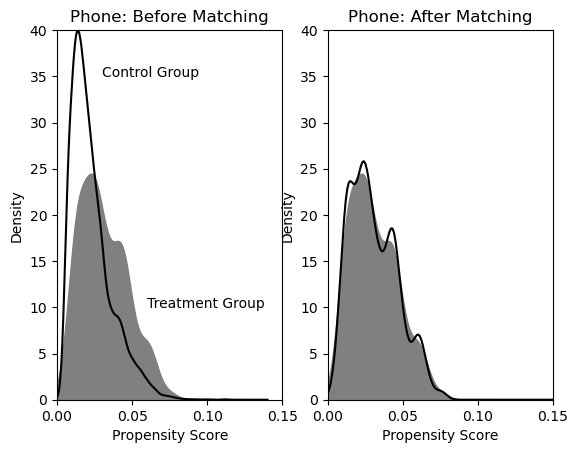

In [4]:
plt.figure(1)
plt.subplot(121)
density0 = gaussian_kde(pscore[treatment==0])
density1 = gaussian_kde(pscore[treatment==1])
xs = np.linspace(0,0.14,200)
plt.plot(xs,density0(xs),color='black')
plt.fill_between(xs,density1(xs),color='gray')
plt.text(0.03, 35, 'Control Group')
plt.text(0.06, 10, 'Treatment Group')
plt.title('Phone: Before Matching')
plt.axis([0,0.15,0,40])
plt.xlabel('Propensity Score')
plt.ylabel('Density')

plt.subplot(122)
density0_post = gaussian_kde(data_matched.pscore[data_matched.treatment==0])
density1_post = gaussian_kde(data_matched.pscore[data_matched.treatment==1])
xs = np.linspace(0,0.2,200)
plt.plot(xs,density0_post(xs),color='black')
plt.fill_between(xs,density1_post(xs),color='gray')
plt.title('Phone: After Matching')
plt.axis([0,0.15,0,40])
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.show()

In [5]:
pairs.plot_balance(covariates, notebook=True)

In [6]:
treated_turnout = imai.VOTED98[treatment == 1].mean()
control_turnout = imai.VOTED98[treatment==0].mean()
matched_control_turnout = data_matched.voted[data_matched.treatment==0].mean()
ATT = treated_turnout - control_turnout
matched_ATT = treated_turnout - matched_control_turnout
print(str("ATT: " + str(ATT)))
print(str("ATT after matching: " + str(matched_ATT)))

ATT: 0.20352833510728247
ATT after matching: 0.07206477732793526


# Examine Stuff

In [ ]:
from pprint import pp

pp(imai.columns)

Index(['PERSONS', 'WARD', 'QUESTION', 'MAILGRP', 'PHONEGRP', 'PERSNGRP',
       'APPEAL', 'CONTACT', 'MAILINGS', 'AGE', 'MAJORPTY', 'VOTE960',
       'VOTE961', 'MAILCALL', 'VOTED98', 'PHNSCRPT', 'DISMC', 'DISPHN', 'PHNC',
       'PHNTRT1', 'PHNTRT2', 'PHNC1', 'PHNC2', 'NEW', 'phone', 'AGE2',
       'PERSONS1_VOTE961', 'PERSONS1_NEW'],
      dtype='object')


PERSONS
Number persons in household

WARD
Ward of residence

QUESTION
Asked to commit to voting

MAILGRP
Sent mail

PHONEGRP
Phone batch #1

PERSNGRP
Personal contact attempted

APPEAL
Content of message

CONTACT
Personal contact occurred

MAILINGS
Number of mailings sent

AGE
Age of respondent

MAJORPTY
Democratic or Republican

VOTE96.0
Abstained in 1996

VOTE96.1
Voted in 1996

MAILCALL
Phone batch #2

VOTED98
Voted in 1998

PHNSCRPT
Script read to phone respondents

DIS.MC
Contacted by phone in batch #2

DIS.PHN
Contacted by phone in batch #1

PHN.C
Contacted by phone

PHNTRT1
Phone contact attempted (no blood or blood/civic)

PHNTRT2
Phone contact attempted (no blood)

PHN.C1
Contact occurred in phntrt1

PHN.C2
Contact occurred in phntrt2

NEW
New voter

phone
Contacted by phone

AGE2
Age squared

In [7]:
pairs = Match(treatment, pscore)
pairs.create(method='many-to-one', caliper=.1, replace=False)
data_matched = whichMatched(pairs, pd.DataFrame({'pscore': pscore, 'treatment' :treatment, 'voted':imai.VOTED98}))

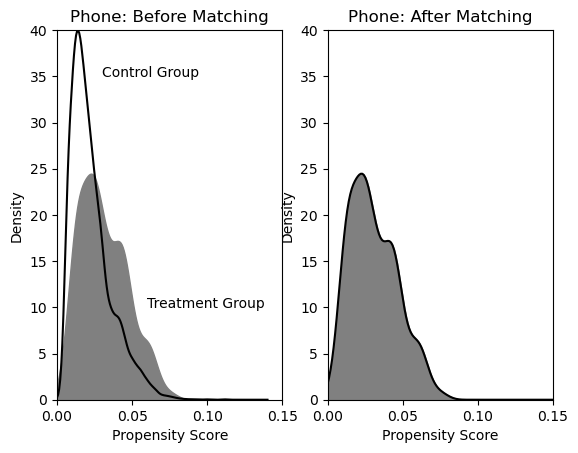

In [10]:
plt.figure(1)
plt.subplot(121)
density0 = gaussian_kde(pscore[treatment==0])
density1 = gaussian_kde(pscore[treatment==1])
xs = np.linspace(0,0.14,200)
plt.plot(xs,density0(xs),color='black')
plt.fill_between(xs,density1(xs),color='gray')
plt.text(0.03, 35, 'Control Group')
plt.text(0.06, 10, 'Treatment Group')
plt.title('Phone: Before Matching')
plt.axis([0,0.15,0,40])
plt.xlabel('Propensity Score')
plt.ylabel('Density')

plt.subplot(122)
density0_post = gaussian_kde(data_matched.pscore[data_matched.treatment==0])
density1_post = gaussian_kde(data_matched.pscore[data_matched.treatment==1])
xs = np.linspace(0,0.2,200)
plt.plot(xs,density0_post(xs),color='black')
plt.fill_between(xs,density1_post(xs),color='gray')
plt.title('Phone: After Matching')
plt.axis([0,0.15,0,40])
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.show()

In [11]:
pairs.plot_balance(covariates, notebook=True)